In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_40DLorenz.recursive_Markovian_PostMeanScore_40DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/40DLnzChaosLessData/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [4]:
config = get_config()
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
local_files

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/40DLnzChaosLessData/IIDNadaraya_f40DLnz_DriftTrack_0073079bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/40DLnzChaosLessData/IIDNadaraya_f40DLnz_DriftTrack_009649bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/40DLnzChaosLessData/IIDNadaraya_f40DLnz_DriftTrack_0127401bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/40DLnzChaosLessData/IIDNadaraya_f40DLnz_DriftTrack_0168214bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/L

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_45111/4167651119.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_45111/4167651119.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


16.080297745721307 0.0073079 inf


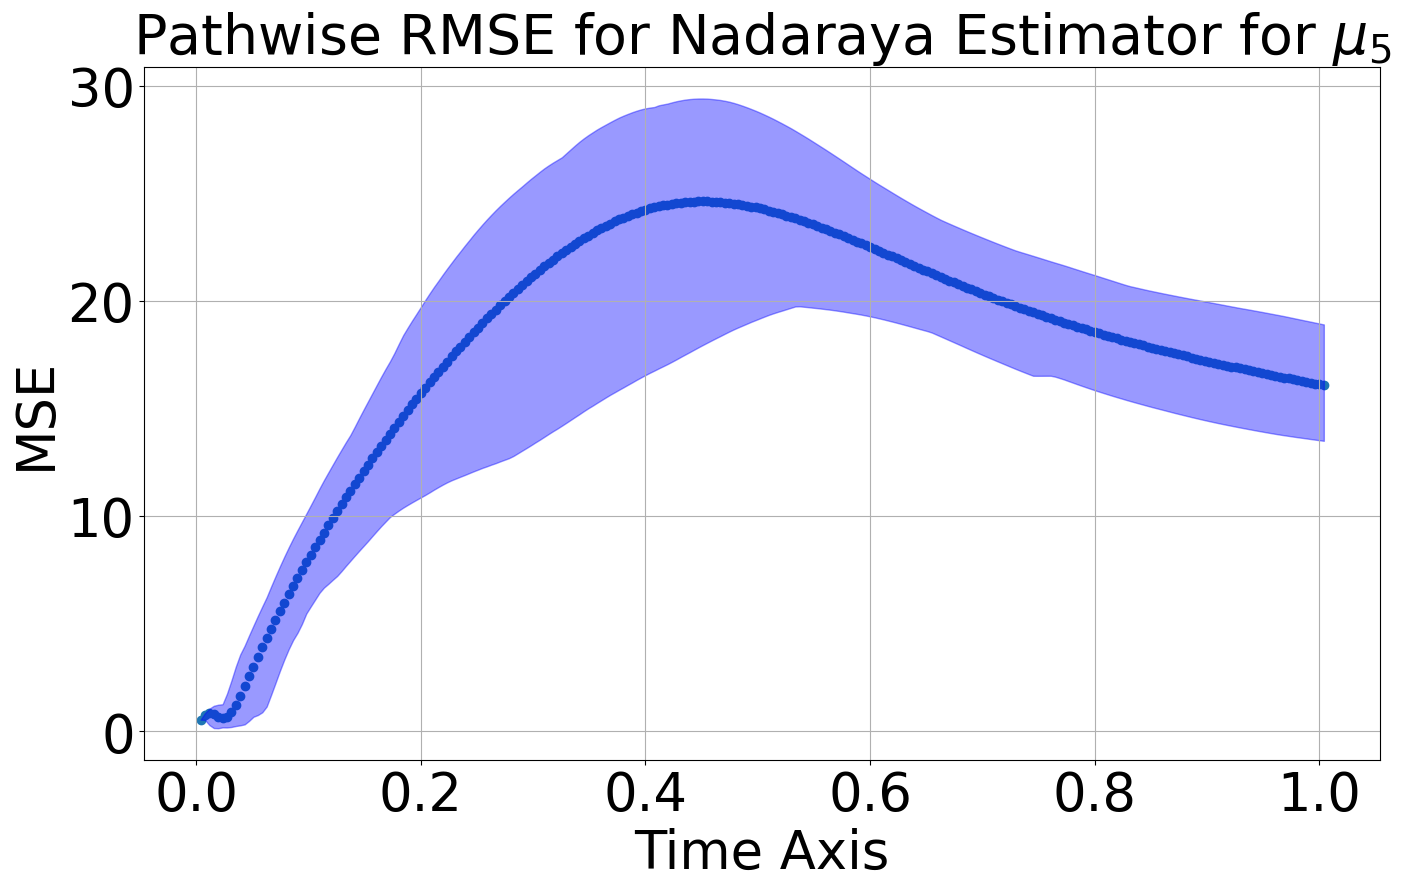

Final time cumulative MSE local-time error 16.080297745721307 with IQR ((13.494298791468108, 18.90412256902911))at bw 0.0073079 for 1.25FConst

15.856597537026374 0.009649 16.080297745721307


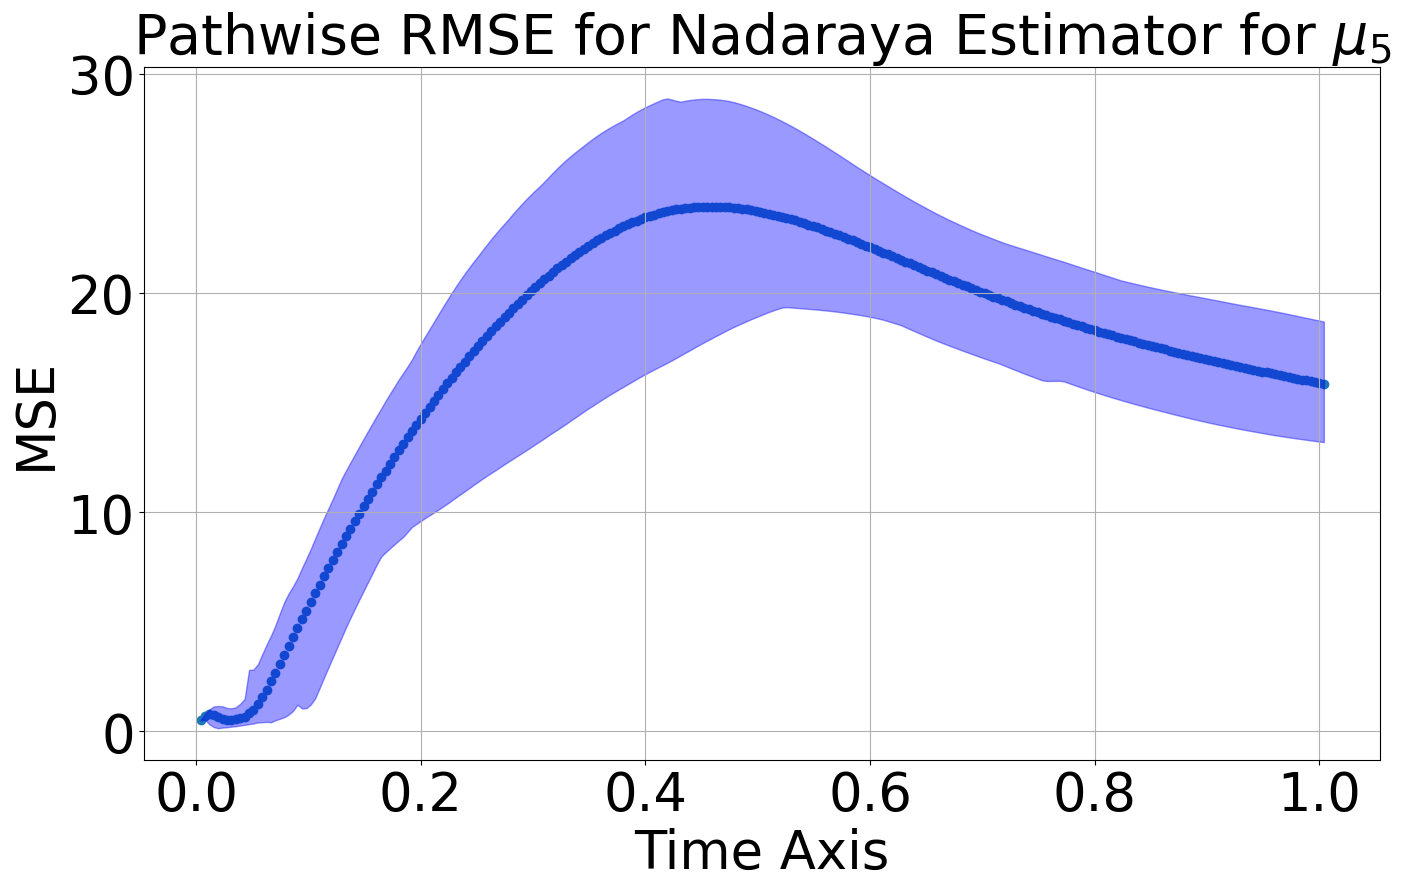

Final time cumulative MSE local-time error 15.856597537026374 with IQR ((13.19217121818768, 18.6964456475176))at bw 0.009649 for 1.25FConst

15.503735091318667 0.0127401 15.856597537026374


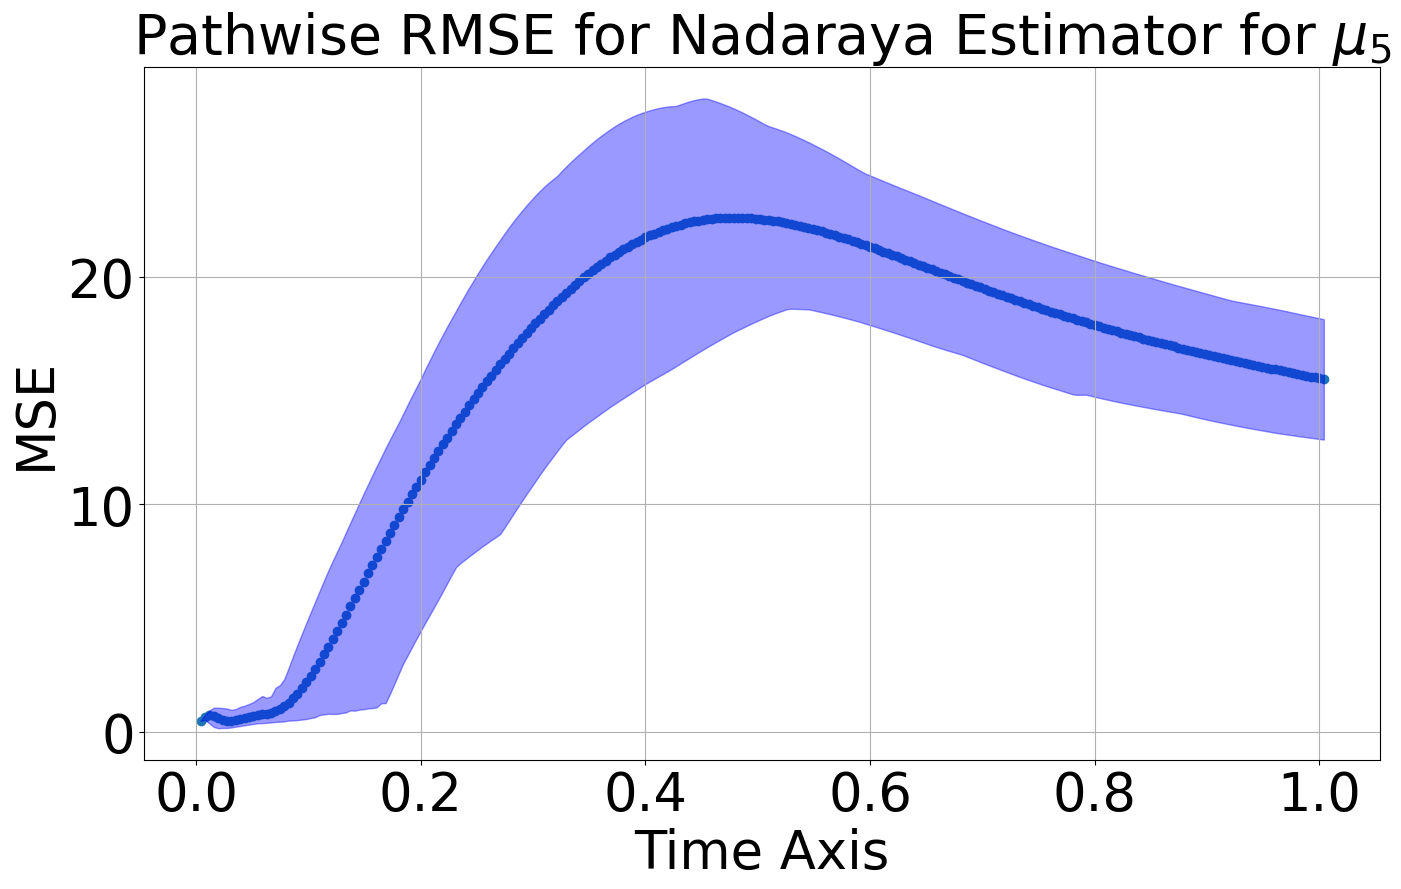

Final time cumulative MSE local-time error 15.503735091318667 with IQR ((12.848597055626524, 18.138442875897557))at bw 0.0127401 for 1.25FConst

14.925357421235653 0.0168214 15.503735091318667


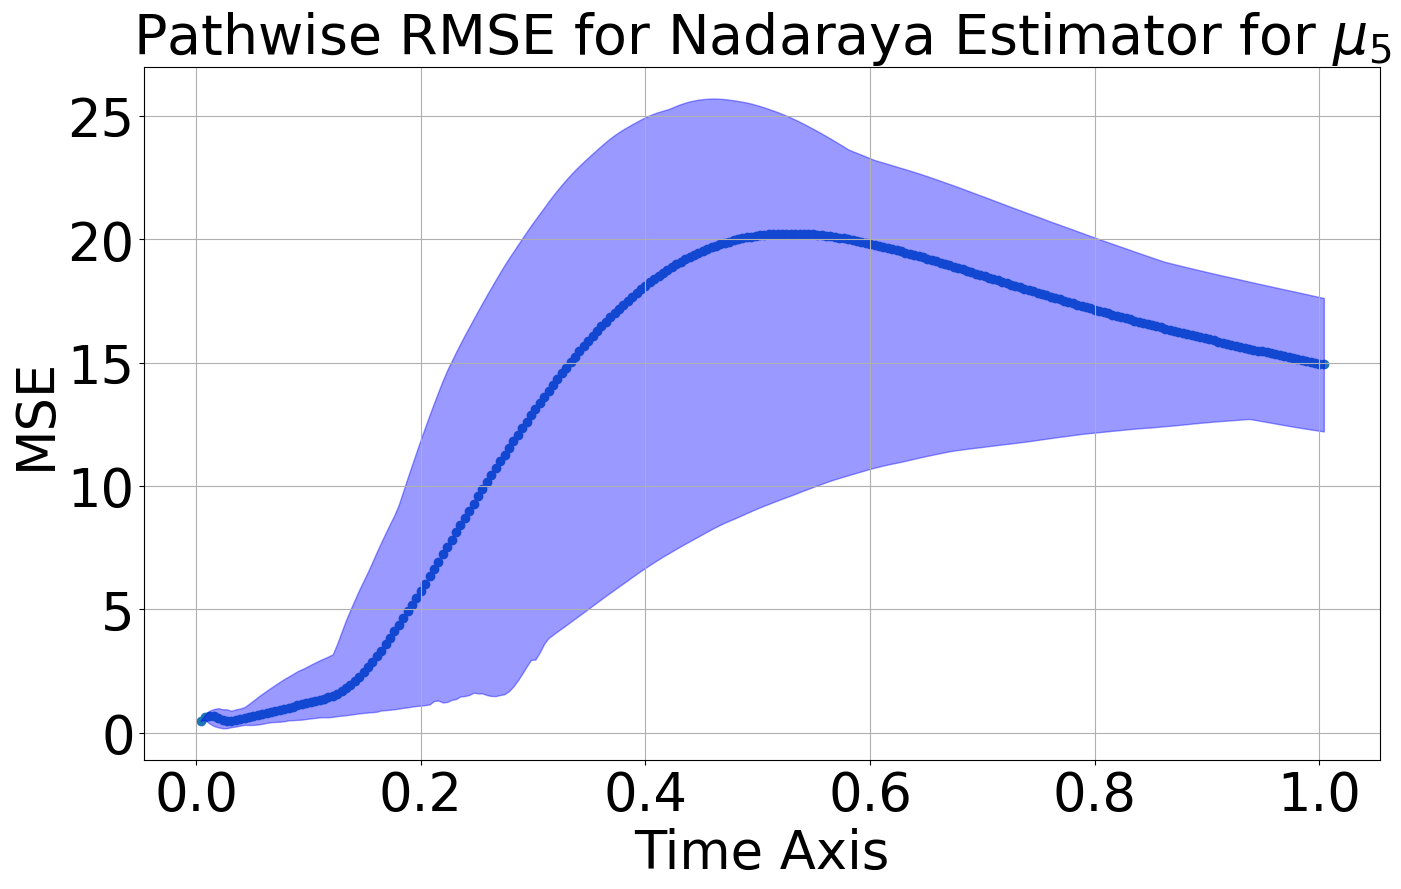

Final time cumulative MSE local-time error 14.925357421235653 with IQR ((12.208049913606185, 17.61722937143735))at bw 0.0168214 for 1.25FConst

13.683755273377116 0.0222102 14.925357421235653


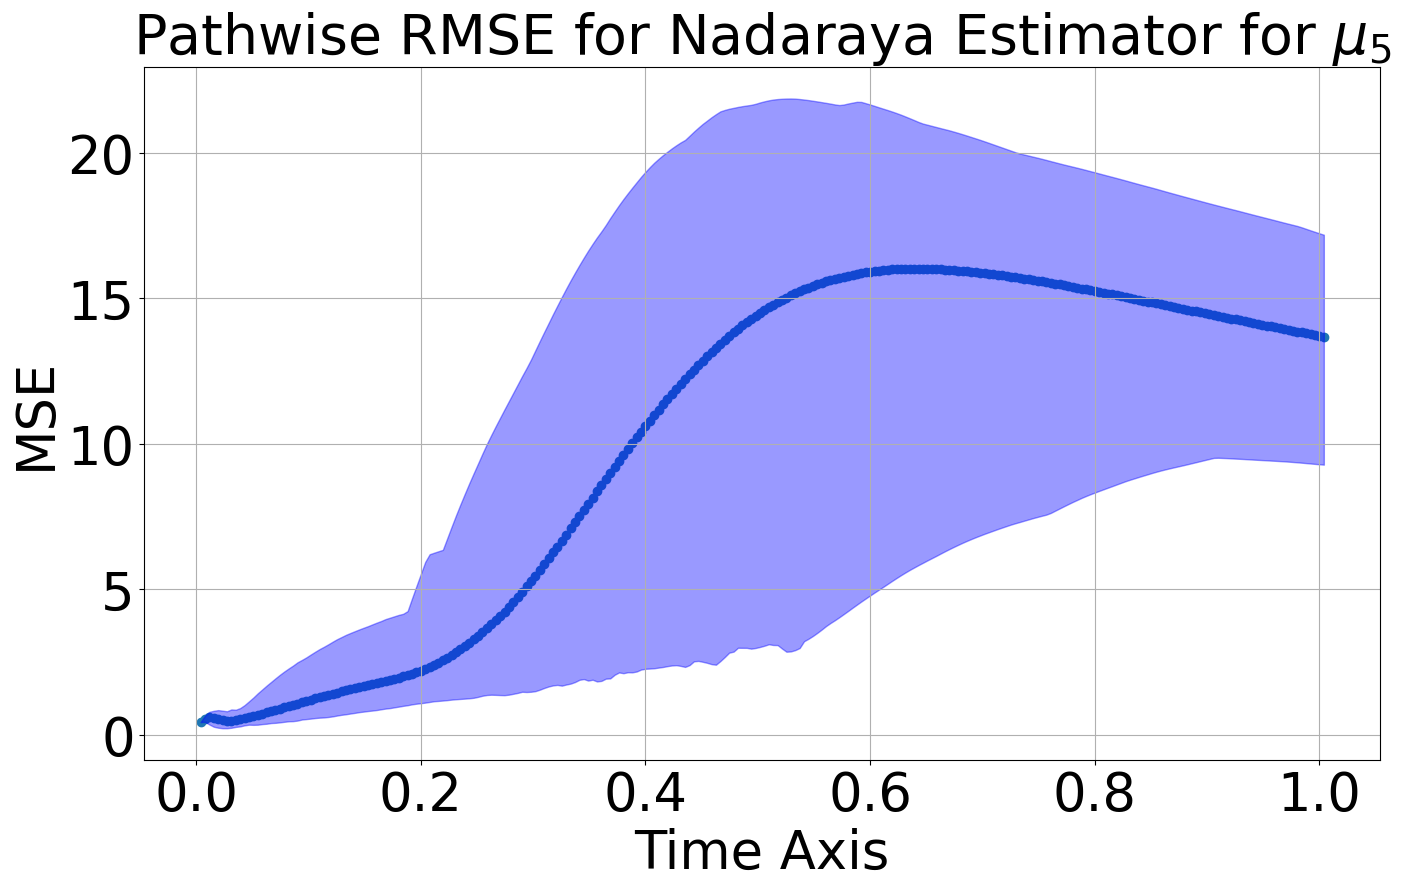

Final time cumulative MSE local-time error 13.683755273377116 with IQR ((9.283874293620762, 17.179524520717493))at bw 0.0222102 for 1.25FConst

10.538466998189731 0.0293252 13.683755273377116


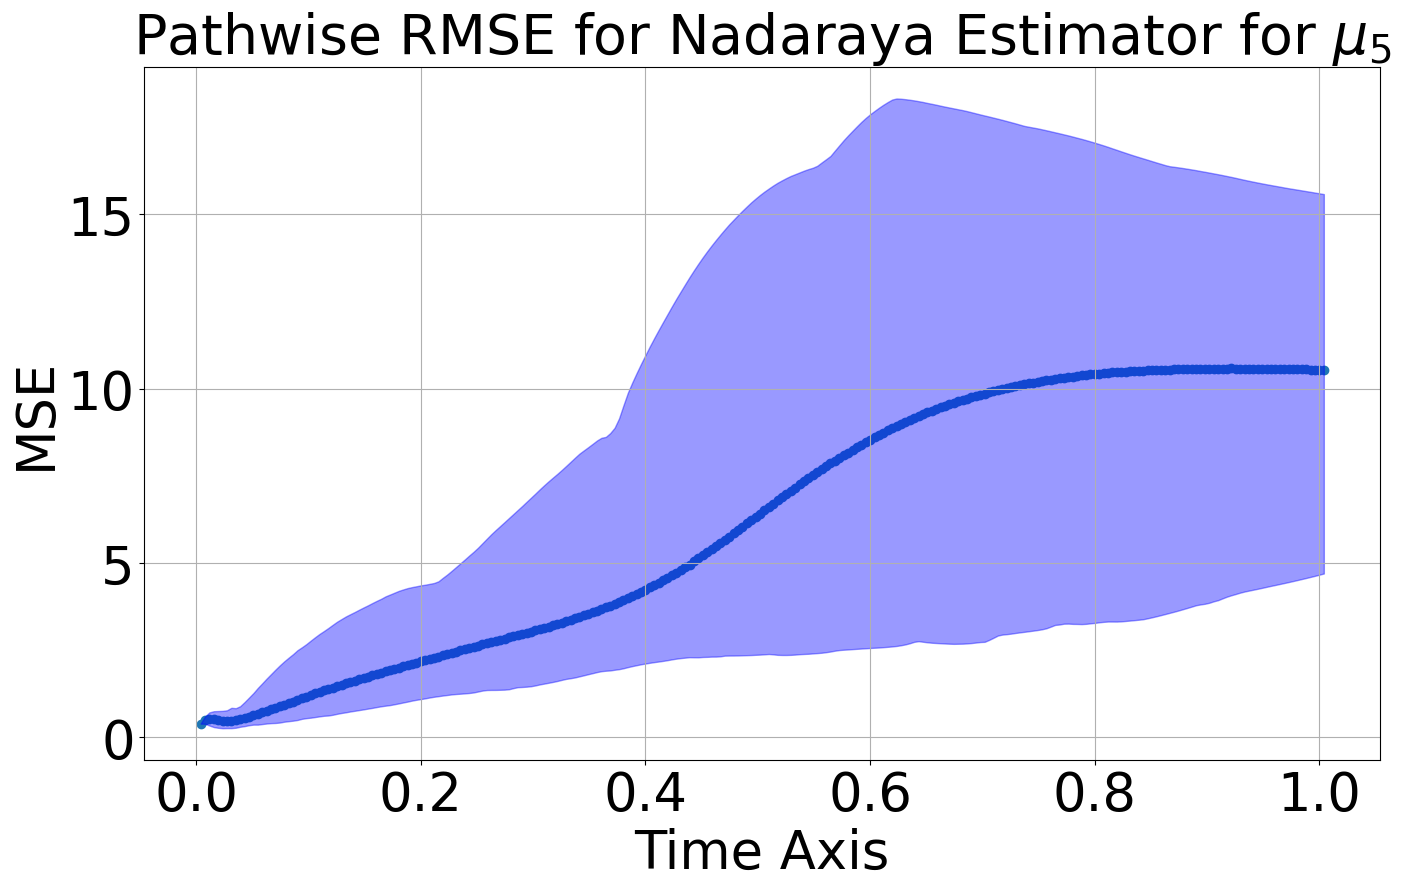

Final time cumulative MSE local-time error 10.538466998189731 with IQR ((4.698595866920386, 15.58217563722398))at bw 0.0293252 for 1.25FConst

6.614596391245813 0.0387196 10.538466998189731


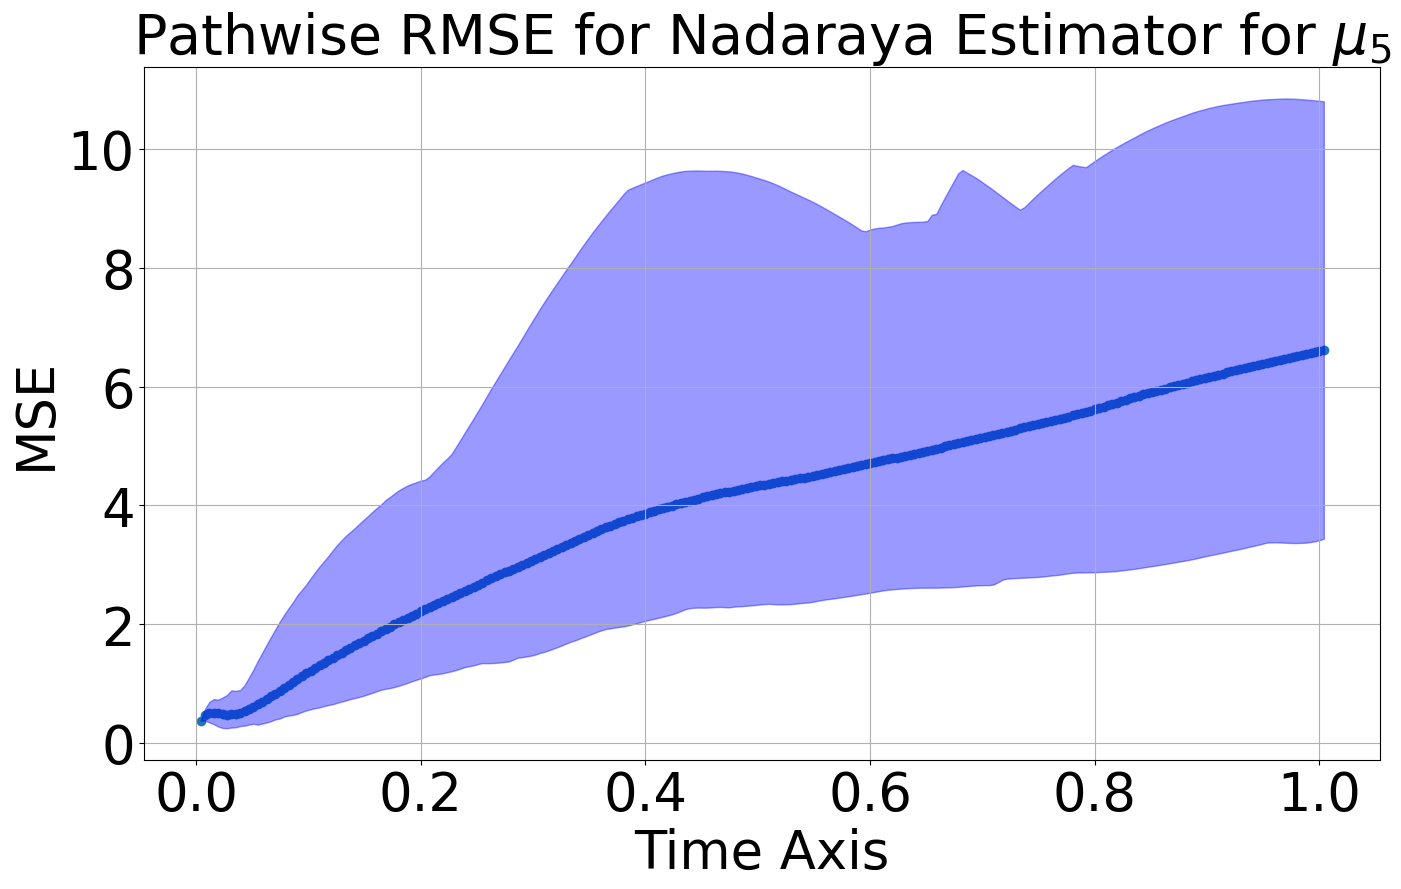

Final time cumulative MSE local-time error 6.614596391245813 with IQR ((3.4374293802231874, 10.799971775210546))at bw 0.0387196 for 1.25FConst

5.841142455268953 0.0511235 6.614596391245813


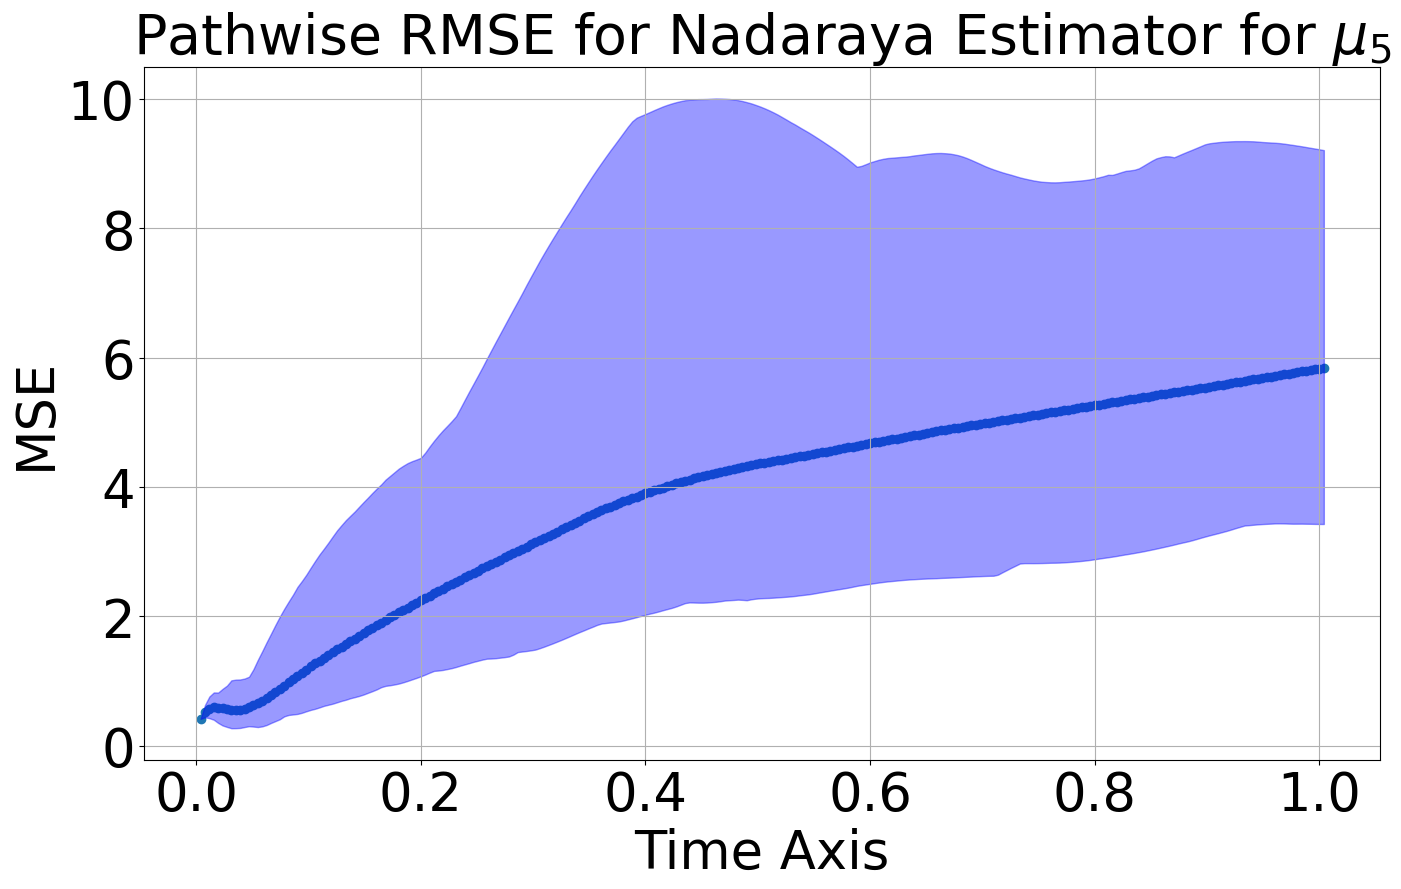

Final time cumulative MSE local-time error 5.841142455268953 with IQR ((3.4258450067875876, 9.205779020223703))at bw 0.0511235 for 1.25FConst

5.786950893096365 0.067501 5.841142455268953


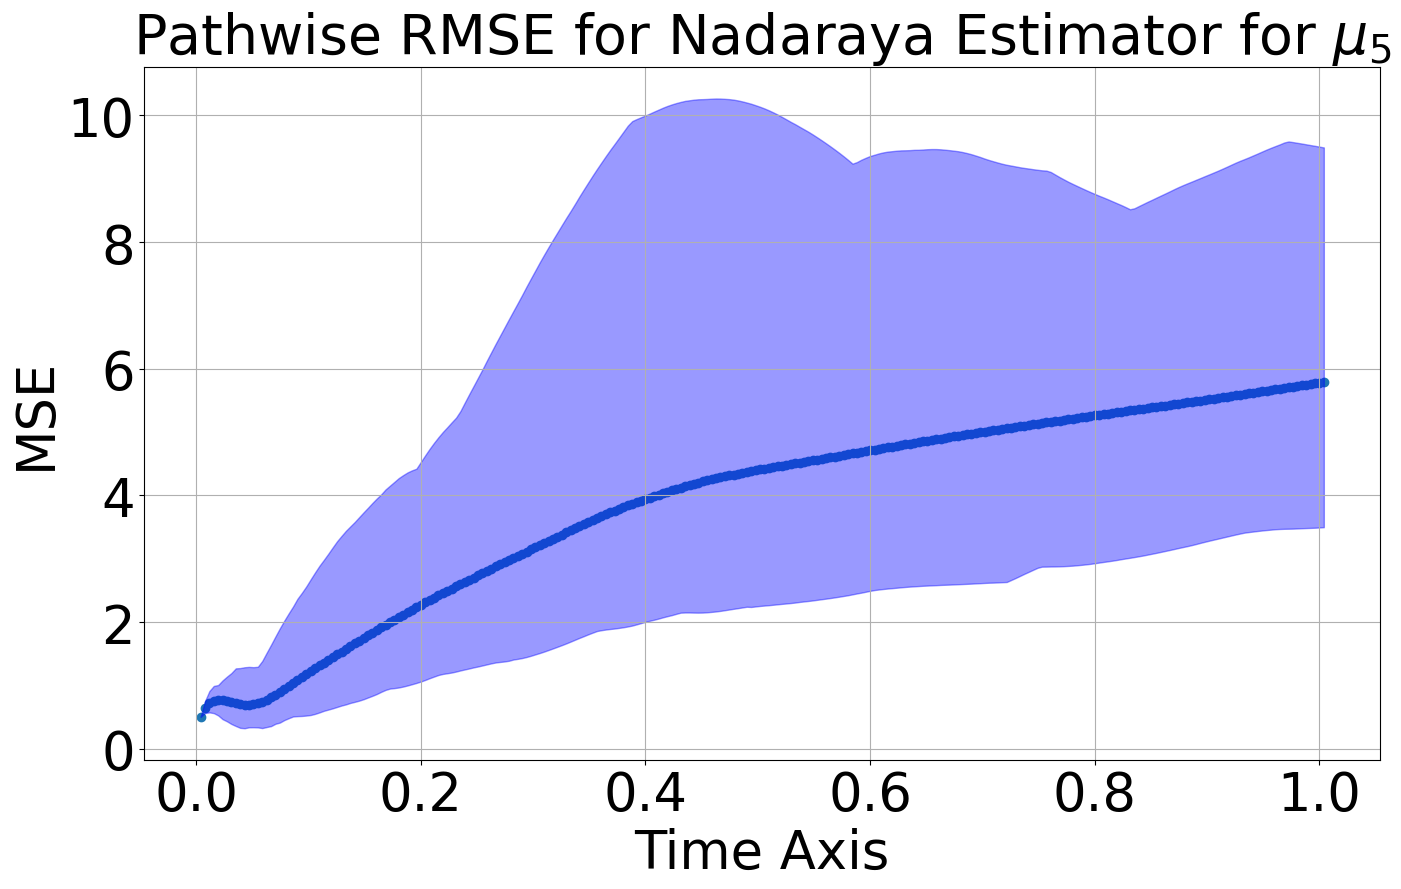

Final time cumulative MSE local-time error 5.786950893096365 with IQR ((3.4970432275457517, 9.494144888813441))at bw 0.067501 for 1.25FConst

5.792317236643955 0.0891251 5.786950893096365
16.417401560866466 0.1 5.786950893096365
5.838772541613695 0.1135011 5.786950893096365
5.898640847304225 0.144544 5.786950893096365
5.96261964015784 0.1840772 5.786950893096365
6.0257595759563225 0.2344229 5.786950893096365
6.089863414015723 0.2985383 5.786950893096365
6.166113430679277 0.3801894 5.786950893096365
6.264636156835005 0.4841724 5.786950893096365
16.417401560866466 0.616595 5.786950893096365
16.417401560866466 0.7852356 5.786950893096365


In [5]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/40DLnzChaosLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [6]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

{'progress_name': 'idx',
 'span_units': 19.0,
 'wall_clock_h_total': 22.72433010790083,
 'wall_clock_per_unit_h': 1.1960173741000437,
 'cpu_avg_pct': 1.5907759882869785,
 'cpu_peak_pct': 6.3,
 'ram_avg_gib': 134.7276154436311,
 'ram_peak_gib': 155.22216,
 'gpu_util_avg_pct': None,
 'gpu_util_peak_pct': None,
 'gpu_mem_avg_gib': None,
 'gpu_mem_peak_gib': None}